In [68]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [69]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

In [70]:
X = np.array([[-1, 0, 2, 3, 4, 5]]).T
y = np.array([[-3, 1, 2, 4, 1, 2]]).T

In [71]:
model = GPy.models.GPRegression(X, y, kernel)
model.Gaussian_noise.variance = 1e-10
model.Gaussian_noise.variance.fix()
model.optimize()

 /usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


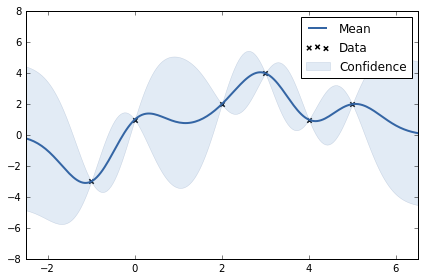

In [72]:
model.plot()

In [73]:
print(model)


Name : GP regression
Objective : 13.532648722067806
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |           value  |  constraints  |  priors
  rbf.variance             |   5.65288590604  |      +ve      |        
  rbf.lengthscale          |  0.632201657964  |      +ve      |        
  Gaussian_noise.variance  |           1e-10  |   fixed +ve   |        


In [74]:
np.savetxt(
    "gp_presentation_data.dat",
    np.hstack((X, y)),
    delimiter='\t',
    comments='',
    header='\t'.join(["X", "y"])
)

In [75]:
Xt = np.arange(-10, 10, 0.05)[:, None]
mu, Sigma = model.predict(Xt, full_cov=True)
twostd = 2 * np.sqrt(np.diag(Sigma)[:, None])

In [76]:
np.savetxt(
    "gp_presentation_gp.dat",
    np.hstack((Xt, mu, twostd)),
    delimiter='\t',
    comments='',
    header='\t'.join(["X", "y", "y_2std"])
)

In [77]:
for i in range(3):
    yt = np.random.multivariate_normal(mu[:, 0], Sigma)[:, None]
    stacked = np.hstack((Xt, yt))
    np.savetxt(
        "gp_presentation_sample_{}.dat".format(i),
        stacked,
        delimiter='\t',
        comments='',
        header='\t'.join(["X", "y"])
    )

# Linear Model

In [78]:
lin_kernel = GPy.kern.Linear(input_dim=1)
lin_model = GPy.models.GPRegression(X, y, lin_kernel)
lin_model.optimize()

 /usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


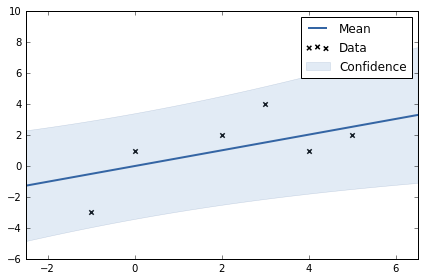

In [79]:
lin_model.plot()

In [80]:
print(lin_model)


Name : GP regression
Objective : 12.786115956627654
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |           value  |  constraints  |  priors
  linear.variances         |  0.304727332446  |      +ve      |        
  Gaussian_noise.variance  |   3.04000542677  |      +ve      |        


In [82]:
m, mvar = lin_model.predict(np.array([[1.]]))

In [83]:
m, np.sqrt(mvar)

(array([[ 0.50787866]]), array([[ 1.75692684]]))

# PCA

In [86]:
from sklearn.decomposition import PCA

In [92]:
pca = PCA(n_components=1, whiten=False)

In [97]:
pca.fit(np.hstack((X, y)))

PCA(copy=True, n_components=1, whiten=False)

In [98]:
pca.components_

array([[ 0.70710678,  0.70710678]])